In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [46]:
train_path = "/Users/trevorpeyton/Downloads/LBNL_Follower_1VMSU_Test/LBNL_Follower_1VMSU_Test1"
test_path = "/Users/trevorpeyton/Downloads/LBNL_Follower_1VMSU_Test/LBNL_Follower_1VMSU_Test2"
train, test = [], []

for file in os.listdir(train_path):
    if file.endswith(".csv"):
        trial = pd.read_csv(os.path.join(train_path, file), usecols=[3, 4], names=["time", "v"])
        vals = trial.v.to_numpy()
        train.append(vals[::6000])
        
for file in os.listdir(test_path):
    if file.endswith(".csv"):
        trial = pd.read_csv(os.path.join(test_path, file), usecols=[3, 4], names=["time", "v"])
        vals = trial.v.to_numpy()
        test.append(vals[::6000])

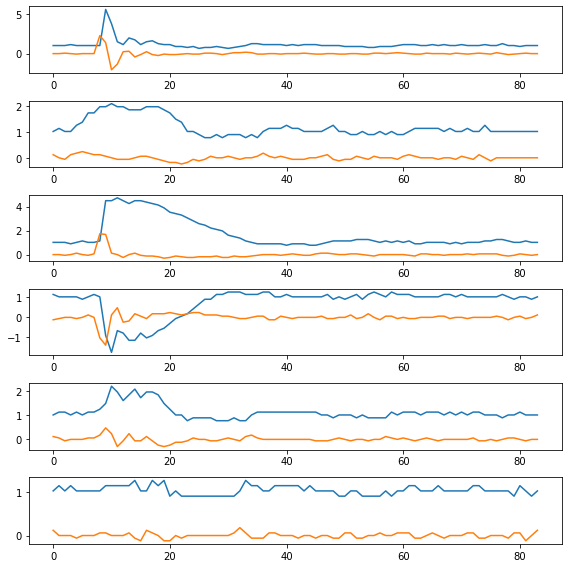

In [119]:
example_class_indexes = [ 0,  6, 17, 21, 23, 35]
fig, axs = plt.subplots(len(example_class_indexes), figsize=(8, 8))
for i, n in enumerate(example_class_indexes):
    axs[i].plot(train[n][:])
    axs[i].plot(np.gradient(train[n][:]))

In [66]:
train_y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 3,
                    0, 4, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 4, 5, 0, 0, 0, 2, 0, 0, 2, 5,
                    0, 0, 2, 2, 2, 0])
test_y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 3,
                   1, 6])

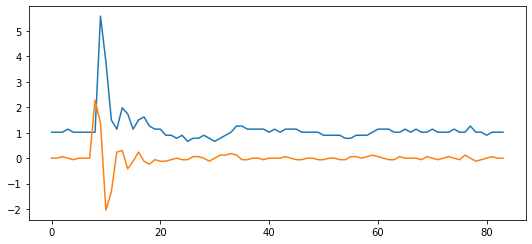

In [114]:
n = 0
plt.plot(train[n])
plt.plot(np.gradient(train[n]))

In [68]:
np.unique(train_y, return_index=True, return_inverse=True, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 0,  6, 17, 21, 23, 35]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 3,
        0, 4, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 4, 5, 0, 0, 0, 2, 0, 0, 2, 5,
        0, 0, 2, 2, 2, 0]),
 array([28,  6, 11,  1,  2,  2]))

In [717]:
model = Sequential()
model.add(Conv1D(16, 10, activation="relu", input_shape=(45,1)))
#model.add(Dense(64, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
#model.summary()

0 0


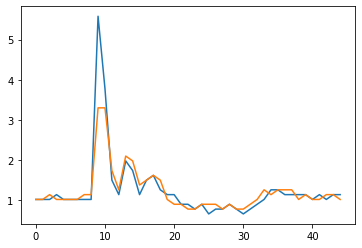

In [724]:
i = 8
t = np.argmax(model.predict(np.array(test[i])[:45][None, :, None]))
print(t, test_y[i])
plt.plot(np.array(train[np.where(y==test_y[i])[0][0]])[:45])
plt.plot(np.array(test[i])[:45])